# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [2]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [3]:
len(reviews)

25000

In [4]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [5]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [7]:
from collections import Counter
import numpy as np

In [8]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [9]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [10]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [11]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [58]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()[0:100]

('edie', 4.6913478822291435)

In [36]:
# words most frequently seen in a review with a "NEGATIVE" label
for i in list(reversed(pos_neg_ratios.most_common()))[0:30]:
    print("1")

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Transforming Text into Numbers

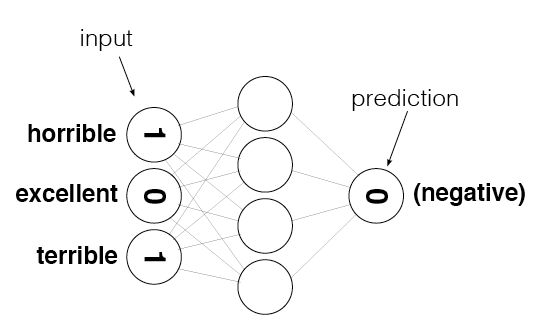

In [64]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

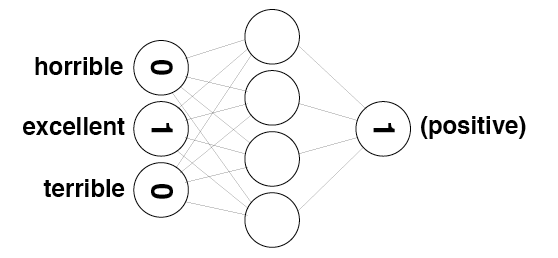

In [65]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

In [91]:
#choose the high frequence word as dic
#the num of the word in dic is what(?)
#积极的词和消极的词各选取５０个
#应该列出所有的词作为字典
dic = []
layer_0 = Counter()
for i in pos_neg_ratios.most_common(100):    
    dic.append(i[0])
for i in list(reversed(pos_neg_ratios.most_common()))[0:100]:
    dic.append(i[0])

print(dic)    


['edie', 'paulie', 'felix', 'polanski', 'matthau', 'victoria', 'mildred', 'gandhi', 'flawless', 'superbly', 'perfection', 'astaire', 'captures', 'voight', 'wonderfully', 'powell', 'brosnan', 'lily', 'bakshi', 'lincoln', 'refreshing', 'breathtaking', 'bourne', 'lemmon', 'delightful', 'flynn', 'andrews', 'homer', 'beautifully', 'soccer', 'elvira', 'underrated', 'gripping', 'superb', 'delight', 'welles', 'sadness', 'sinatra', 'touching', 'timeless', 'macy', 'unforgettable', 'favorites', 'stewart', 'sullivan', 'extraordinary', 'hartley', 'brilliantly', 'friendship', 'wonderful', 'palma', 'magnificent', 'finest', 'jackie', 'ritter', 'tremendous', 'freedom', 'fantastic', 'terrific', 'noir', 'sidney', 'outstanding', 'pleasantly', 'mann', 'nancy', 'marie', 'marvelous', 'excellent', 'ruth', 'stanwyck', 'widmark', 'splendid', 'chan', 'exceptional', 'tender', 'gentle', 'poignant', 'gem', 'amazing', 'chilling', 'fisher', 'davies', 'captivating', 'darker', 'april', 'kelly', 'blake', 'overlooked', '

In [92]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent \
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state, reset the layer to be all 0s
    # 也可能一个词存在多次，因此按照字典一一对应判定有缺陷
    word_counter= Counter()
    for word in review.split(" "):
        word_counter[word] += 1
    #便历l字典，字典中的每一个词在ｌayer_0这个counter()中的值
    for word in dic:     
        if word in [item[0] for item in word_counter.most_common()]:
          layer_0[word]= word_counter[word]
        else:
          layer_0[word]=0       
    pass

def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if label =="POSITIVE":
        return '1'
    if label == "NEGATIVE":
        return '0'
    
    pass


In [93]:
update_input_layer(reviews[2])

In [94]:
print(layer_0.most_common())

[('tender', 1), ('stupid', 1), ('edie', 0), ('paulie', 0), ('felix', 0), ('polanski', 0), ('matthau', 0), ('victoria', 0), ('mildred', 0), ('gandhi', 0), ('flawless', 0), ('superbly', 0), ('perfection', 0), ('astaire', 0), ('captures', 0), ('voight', 0), ('wonderfully', 0), ('powell', 0), ('brosnan', 0), ('lily', 0), ('bakshi', 0), ('lincoln', 0), ('refreshing', 0), ('breathtaking', 0), ('bourne', 0), ('lemmon', 0), ('delightful', 0), ('flynn', 0), ('andrews', 0), ('homer', 0), ('beautifully', 0), ('soccer', 0), ('elvira', 0), ('underrated', 0), ('gripping', 0), ('superb', 0), ('delight', 0), ('welles', 0), ('sadness', 0), ('sinatra', 0), ('touching', 0), ('timeless', 0), ('macy', 0), ('unforgettable', 0), ('favorites', 0), ('stewart', 0), ('sullivan', 0), ('extraordinary', 0), ('hartley', 0), ('brilliantly', 0), ('friendship', 0), ('wonderful', 0), ('palma', 0), ('magnificent', 0), ('finest', 0), ('jackie', 0), ('ritter', 0), ('tremendous', 0), ('freedom', 0), ('fantastic', 0), ('terr